# Ridge Regression + scaling the data first

In [18]:
import pandas as pd
import numpy as np

sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


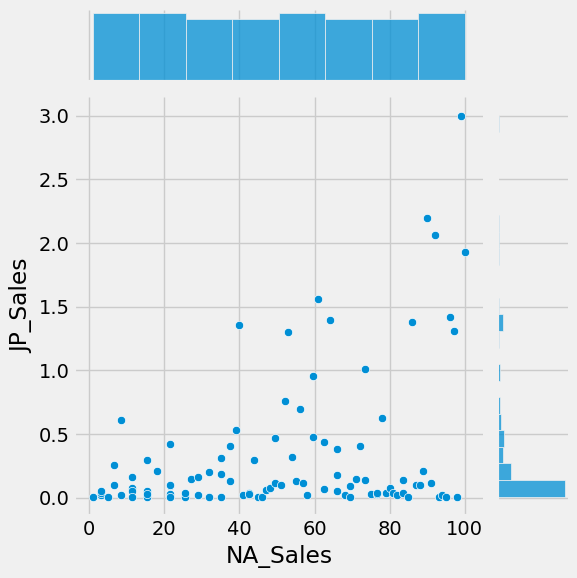

In [19]:
import seaborn as sns
s = sales[(sales.NA_Sales.notnull()  & sales.JP_Sales.notnull())]
s = sales[((sales.NA_Sales > 0) & (sales.JP_Sales > 0))]
s = s.sample(100, random_state = 0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(x=s.NA_Sales.rank(), y=s.JP_Sales)

## scaling

In [20]:
from sklearn.preprocessing import StandardScaler

NA_sales = s.NA_Sales.rank().values[:, np.newaxis]
JP_sales = s.JP_Sales.values[:, np.newaxis]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(NA_sales)

## model

In [21]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

def get_ridge_model(degree, alpha):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(X_scaled)
    clf = Ridge(alpha = alpha)
    clf.fit(NA_sales_ranks_poly, JP_sales)
    return clf

def get_ridge_prediction(degree, alpha):
    poly = PolynomialFeatures(degree = degree)
    NA_sales_ranks_poly = poly.fit_transform(X_scaled)
    clf = get_ridge_model(degree, alpha)
    JP_sales_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sales_predictions.flatten())).reshape((100, 2))
    return result

Text(0.5, 1.0, 'degree = 10, alpha = $10^1$')

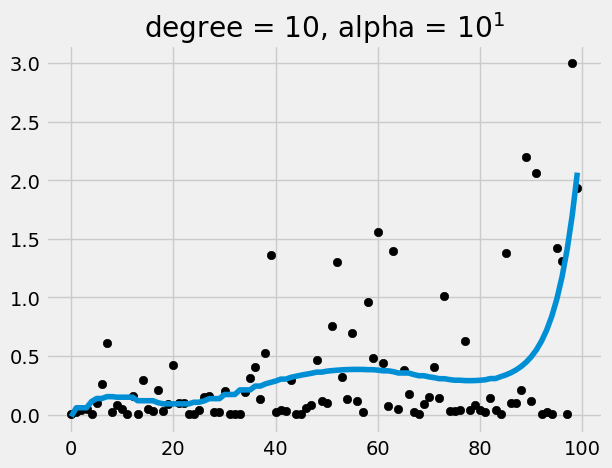

In [22]:
result = get_ridge_prediction(10, 1)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^1$")

Text(0.5, 1.0, 'degree = 10, alpha = $10^5$')

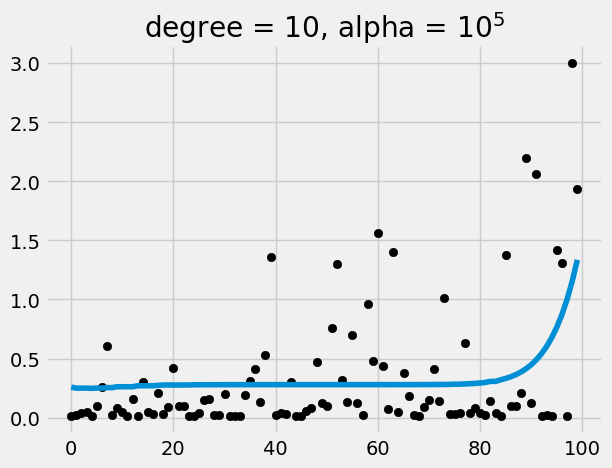

In [25]:
result = get_ridge_prediction(10, 10**5)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color = 'black')
plt.gca().set_title("degree = 10, alpha = $10^5$")

In [26]:
get_ridge_model(10, 10**5).coef_

array([[ 0.00000000e+00,  1.13152997e-04, -7.29761994e-07,
         2.21957988e-04,  5.72487084e-05,  5.35008441e-04,
         2.22417244e-04,  1.37303564e-03,  6.97679927e-04,
         3.65050399e-03,  2.08452619e-03]])

In [27]:
get_ridge_model(10, 10).coef_

array([[ 0.        ,  0.0812776 , -0.08692115,  0.01449722, -0.02645131,
         0.0007039 ,  0.01828241, -0.03123058,  0.00554937,  0.01682622,
         0.00135538]])